# Project Name:

Data Science April Minor Project done by RAMYASRI SYDU

# Problem statement: 


Create a classification model to predict the gender (male or 
female) based on different acoustic parameters

<b>importing required libraries</b>

In [42]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

<b>loading dataset

In [2]:
data = pd.read_csv("C:/Users/ramya/Downloads/voice.csv")
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [3]:
data.head(6)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male


In [4]:
data.shape

(3168, 21)

In [5]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
data.columns 

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [7]:
data.index

RangeIndex(start=0, stop=3168, step=1)

<b>step1:</b>    remove or handle null values 

In [8]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
data.duplicated().sum()

2

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(3166, 21)

In [13]:
data['label'].value_counts()

female    1583
male      1583
Name: label, dtype: int64

In [14]:
data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

<b>step2:</b>  Depict percentage distribution of label on a pie chart


In [15]:
data.groupby(['label']).mean()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,0.190986,0.049146,0.195930,0.165334,0.223169,0.057835,2.985584,24.817034,0.873063,0.344782,0.178535,0.190986,0.169761,0.039424,0.263839,0.928915,0.065013,5.729870,5.664857,0.170104
male,0.170786,0.065115,0.175256,0.115546,0.226326,0.110781,3.296207,48.357244,0.917225,0.471914,0.151961,0.170786,0.115860,0.034179,0.253836,0.728821,0.040249,4.358569,4.318321,0.177398


In [16]:
names=data.label.value_counts().index
count=data.label.value_counts().values

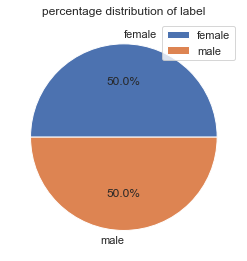

In [17]:
plt.pie(count,labels=names, autopct='%1.1f%%')
plt.title('percentage distribution of label')
plt.legend()
plt.show()

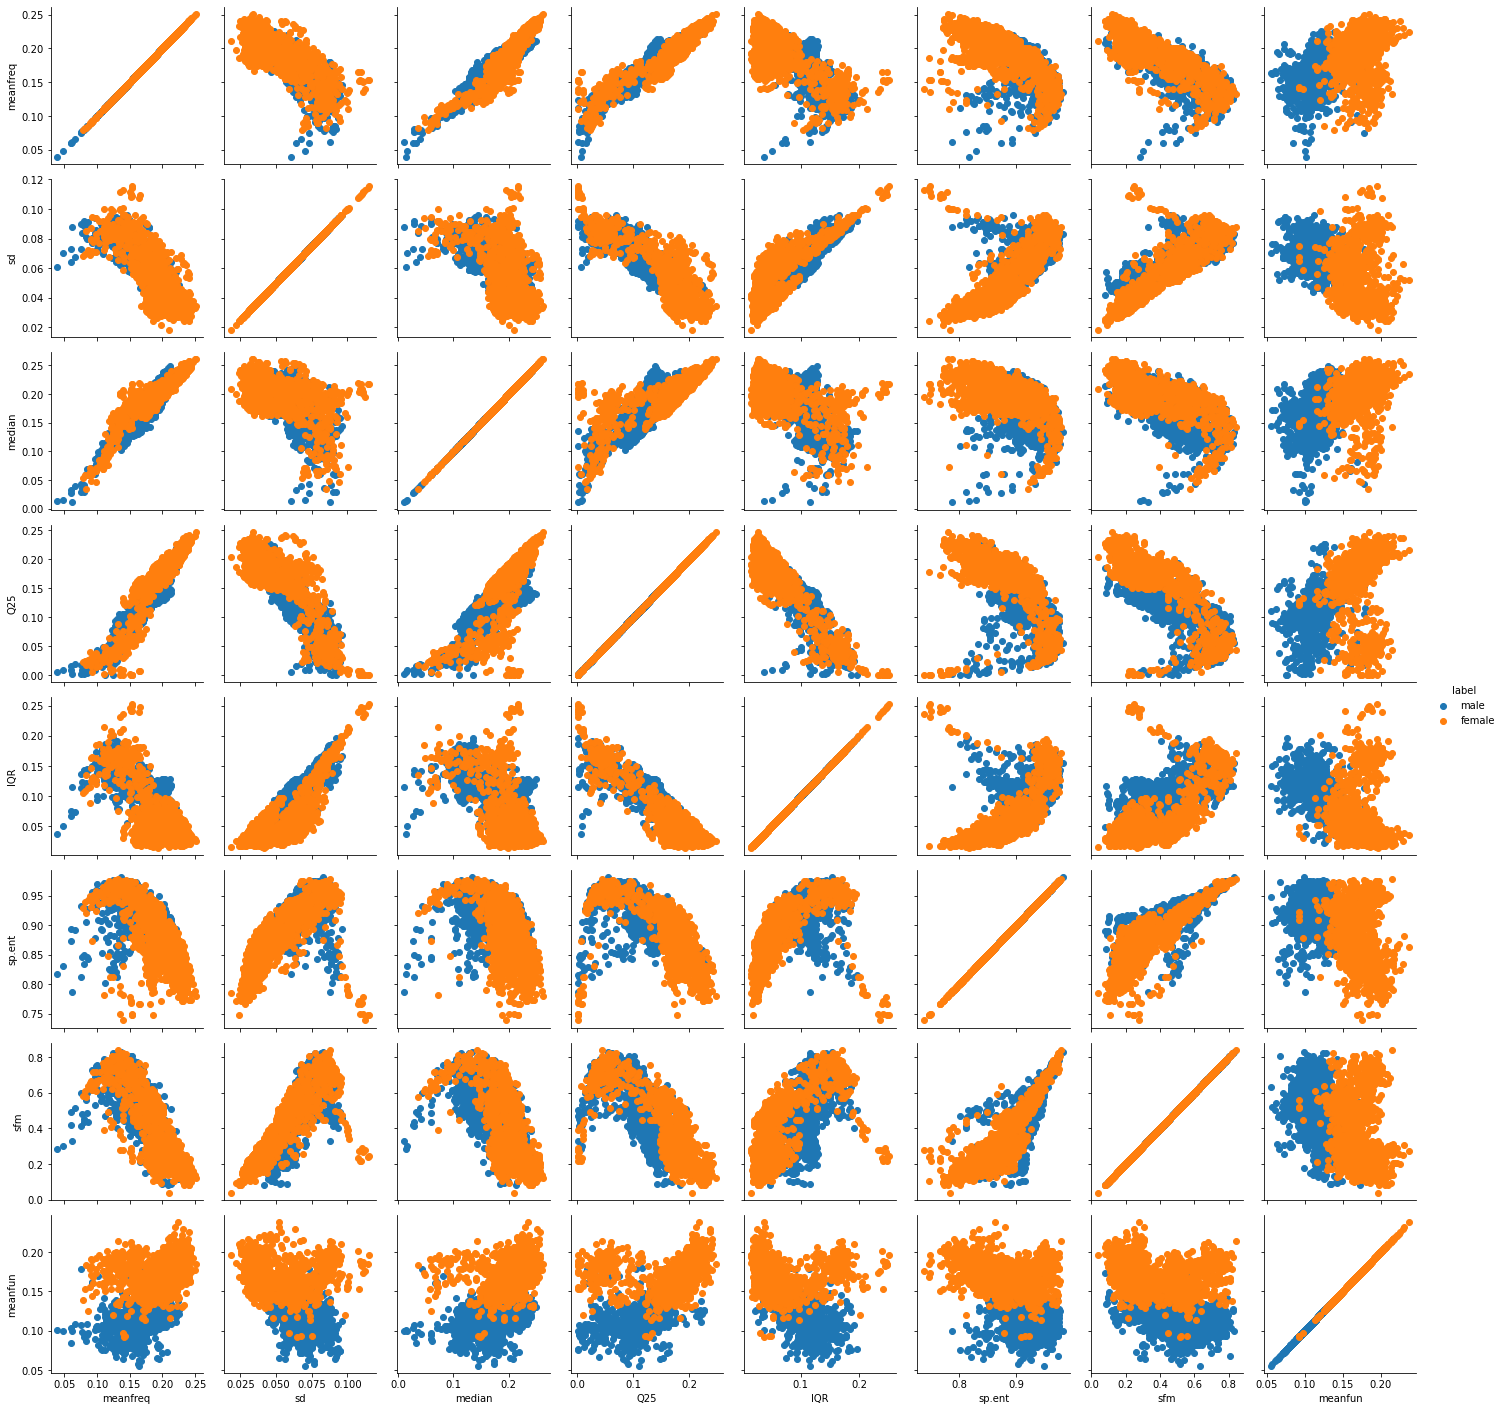

In [18]:
#analyzing different features pairwise
g = sns.PairGrid(data[['meanfreq','sd','median','Q25','IQR','sp.ent','sfm','meanfun','label']], hue = "label")
g = g.map(plt.scatter).add_legend()

<b>step 3:</b>  Considering all the features as independent feature and label as dependent feature, split the dataset training and testing data with test size=20%

In [18]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(3166, 20)
(3166,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [20]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2532, 20)
(2532,)
(634, 20)
(634,)


<b>step4:</b>Apply the following classifier models on training dataset and generate predictions for
the test dataset<br>
<b>step5:</b>Also generate confusion_matrix and classification report for each model generated in
Q4.

In [23]:
#a) DECISIONTREE CLASSIFIER
m1 = DecisionTreeClassifier()
m1.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
print('training score', m1.score(x_train, y_train))
print('testing score', m1.score(x_test, y_test))

training score 1.0
testing score 0.9684542586750788


In [25]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

['male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male'
 'fema

In [26]:
cm_m1 = confusion_matrix(y_test, ypred_m1)
print(cm_m1)

[[307  11]
 [  9 307]]


In [27]:
print(classification_report(y_test, ypred_m1))

              precision    recall  f1-score   support

      female       0.97      0.97      0.97       318
        male       0.97      0.97      0.97       316

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [28]:
#b) RANDOMFOREST CLASSIFIER
m2 = RandomForestClassifier()
m2.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
print('training score', m2.score(x_train, y_train))
print('testing score', m2.score(x_test, y_test))

training score 1.0
testing score 0.9858044164037855


In [30]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

['male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male'
 'female' 'female' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' '

In [31]:
cm_m2 = confusion_matrix(y_test, ypred_m2)
print(cm_m2)

[[313   5]
 [  4 312]]


In [32]:
print(classification_report(y_test, ypred_m2))

              precision    recall  f1-score   support

      female       0.99      0.98      0.99       318
        male       0.98      0.99      0.99       316

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [33]:
#c) KNN CLASSIFIER
m3 = KNeighborsClassifier()
m3.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
print('training score', m3.score(x_train, y_train))
print('testing score', m3.score(x_test, y_test))

training score 0.816350710900474
testing score 0.7003154574132492


In [35]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

['male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male'
 'fema

In [36]:
cm_m3 = confusion_matrix(y_test, ypred_m3)
print(cm_m3)

[[216 102]
 [ 88 228]]


In [37]:
print(classification_report(y_test, ypred_m3))

              precision    recall  f1-score   support

      female       0.71      0.68      0.69       318
        male       0.69      0.72      0.71       316

    accuracy                           0.70       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.70      0.70      0.70       634



In [39]:
from sklearn.linear_model import LogisticRegression

In [43]:
#d) Logistic Regression
m4 = LogisticRegression()
m4.fit(x_train,y_train)

LogisticRegression()

In [44]:
print('training score', m4.score(x_train, y_train))
print('testing score', m4.score(x_test, y_test))

training score 0.8803317535545023
testing score 0.8785488958990536


In [45]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

['male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'ma

In [46]:
cm_m4 = confusion_matrix(y_test, ypred_m4)
print(cm_m4)

[[264  54]
 [ 23 293]]


In [47]:
print(classification_report(y_test, ypred_m4))

              precision    recall  f1-score   support

      female       0.92      0.83      0.87       318
        male       0.84      0.93      0.88       316

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.88      0.88      0.88       634



In [48]:
#e) SVM Classifier
m5 = SVC()
m5.fit(x_train,y_train)

SVC()

In [49]:
print('training score', m5.score(x_train, y_train))
print('testing score', m5.score(x_test, y_test))

training score 0.6757503949447078
testing score 0.6719242902208202


In [50]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

['male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'mal

In [51]:
cm_m5 = confusion_matrix(y_test, ypred_m5)
print(cm_m5)

[[179 139]
 [ 69 247]]


In [52]:
print(classification_report(y_test, ypred_m5))

              precision    recall  f1-score   support

      female       0.72      0.56      0.63       318
        male       0.64      0.78      0.70       316

    accuracy                           0.67       634
   macro avg       0.68      0.67      0.67       634
weighted avg       0.68      0.67      0.67       634



<b>step6: </b>Report the model with the best accuracy

In [53]:
#accuracy_score of decisiontree classifier 
print(accuracy_score(ypred_m1,y_test))
#accuracy_score of randomforest classifier 
print(accuracy_score(ypred_m2,y_test))
#accuracy_score of knn classifier 
print(accuracy_score(ypred_m3,y_test))
#accuracy_score of logistic regression
print(accuracy_score(ypred_m4,y_test))
#accuracy_score of SVM classifier 
print(accuracy_score(ypred_m5,y_test))

0.9684542586750788
0.9858044164037855
0.7003154574132492
0.8785488958990536
0.6719242902208202


In [54]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression(),SVC()]
model_names=['DecisionTree','RandomForestClassifier','KNearestNeighbors','LogisticRegression','SVM']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [55]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,DecisionTree,0.966877
1,RandomForestClassifier,0.985804
2,KNearestNeighbors,0.700315
3,LogisticRegression,0.878549
4,SVM,0.671924


<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algo'>

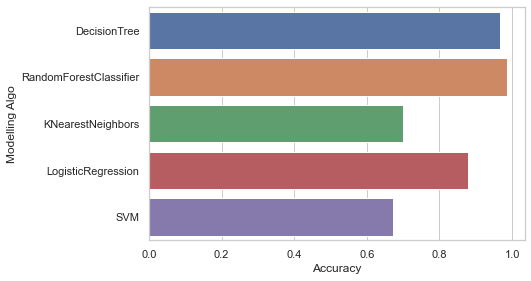

In [56]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

<font size="5"><span style="color:blue"><b>conclusion:</b></span></font><span style="color:red" ><font size = "5">  randomforest gives an amazing accuracy of around 98.1 %.</font></span>